<h2><a href="https://leetcode.com/problems/surrounded-regions/">130. Surrounded Regions</a></h2><h3>Medium</h3><hr><p>Given an <code>m x n</code> matrix <code>board</code> containing <code>&#39;X&#39;</code> and <code>&#39;O&#39;</code>, <em>capture all regions that are 4-directionally&nbsp;surrounded by</em> <code>&#39;X&#39;</code>.</p>

<p>A region is <strong>captured</strong> by flipping all <code>&#39;O&#39;</code>s into <code>&#39;X&#39;</code>s in that surrounded region.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/19/xogrid.jpg" style="width: 550px; height: 237px;" />
<pre>
<strong>Input:</strong> board = [[&quot;X&quot;,&quot;X&quot;,&quot;X&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;O&quot;,&quot;O&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;X&quot;,&quot;O&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;O&quot;,&quot;X&quot;,&quot;X&quot;]]
<strong>Output:</strong> [[&quot;X&quot;,&quot;X&quot;,&quot;X&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;X&quot;,&quot;X&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;X&quot;,&quot;X&quot;,&quot;X&quot;],[&quot;X&quot;,&quot;O&quot;,&quot;X&quot;,&quot;X&quot;]]
<strong>Explanation:</strong> Notice that an &#39;O&#39; should not be flipped if:
- It is on the border, or
- It is adjacent to an &#39;O&#39; that should not be flipped.
The bottom &#39;O&#39; is on the border, so it is not flipped.
The other three &#39;O&#39; form a surrounded region, so they are flipped.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> board = [[&quot;X&quot;]]
<strong>Output:</strong> [[&quot;X&quot;]]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == board.length</code></li>
	<li><code>n == board[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 200</code></li>
	<li><code>board[i][j]</code> is <code>&#39;X&#39;</code> or <code>&#39;O&#39;</code>.</li>
</ul>


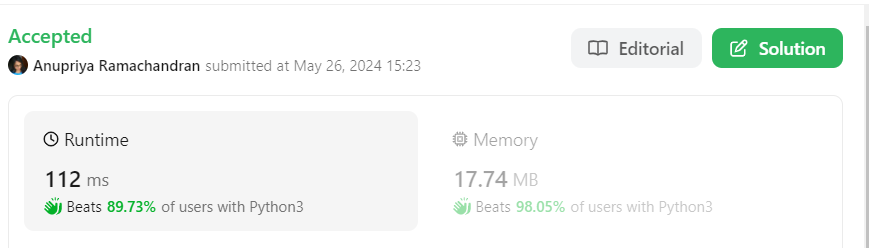

In [2]:
# Strategy: First traverse along the borders and get the borderline 'O's 
# and send them to dfs - mark them as visited, with all the Os found in its DFS path
# Then traverse through matrix cell by cell, and find the cell which is O and NOT VISITED, change it to 'X'

from typing import List
class Solution:
    def solve(self, mat: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        rows, cols = len(mat), len(mat[0])

        def dfs(mat, x, y, visit):
            visit[x][y] = 1  # Mark Visited

            for dx, dy in directions:
                if 0 <= x + dx <len(mat) and 0 <= y + dy < len(mat[0]) and visit[x+dx][y + dy] == 0 and mat[x+dx][y + dy] == 'O':
                    dfs(mat, x+dx , y+dy, visit)

                

        # Mark all the border 0s as visited
        visit = [[0 for _ in range(len(mat[0]))] for _ in range(len(mat))]
        
        # horizontal border lines
        for i in range(len(mat[0])):
            if mat[0][i] == 'O':
                dfs(mat, 0, i, visit)

            if mat[rows-1][i] == 'O':
                dfs(mat, rows-1, i, visit)

        # Vertical border line
        for i in range(len(mat)):
            if mat[i][0] == 'O':
                dfs(mat, i, 0, visit)

            if mat[i][cols-1] == 'O':
                dfs(mat,i, cols-1, visit)


        # Traverse through Matrix and mark UNVISITED cells with O as X
        for i in range(len(mat)):
            for j in range(len(mat[0])):
                if mat[i][j] == 'O' and visit[i][j] == 0:
                    mat[i][j] = 'X'

        return mat